In [50]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

pd.options.display.float_format = '{:,.2f}'.format

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioLab as pl

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [51]:
ISINs = ['EUNA', 'IWDA']
Nomes = ['EUNA', 'IWDA']

fundos = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = pl.normalize(fundos)

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

In [20]:
returns = fundos.pct_change()

In [22]:
from pandas.tseries.offsets import DateOffset
plus_1_year = returns.iloc[0].name + DateOffset(years=1)

### Comparação de carteiras de ETFs (usando AGGH/EUNA e IWDA)

In [52]:
pl.print_title('Análise desde ' +  Begin + ' até ' + End)

**Análise desde 2017-12-14 até 2020-10-22**

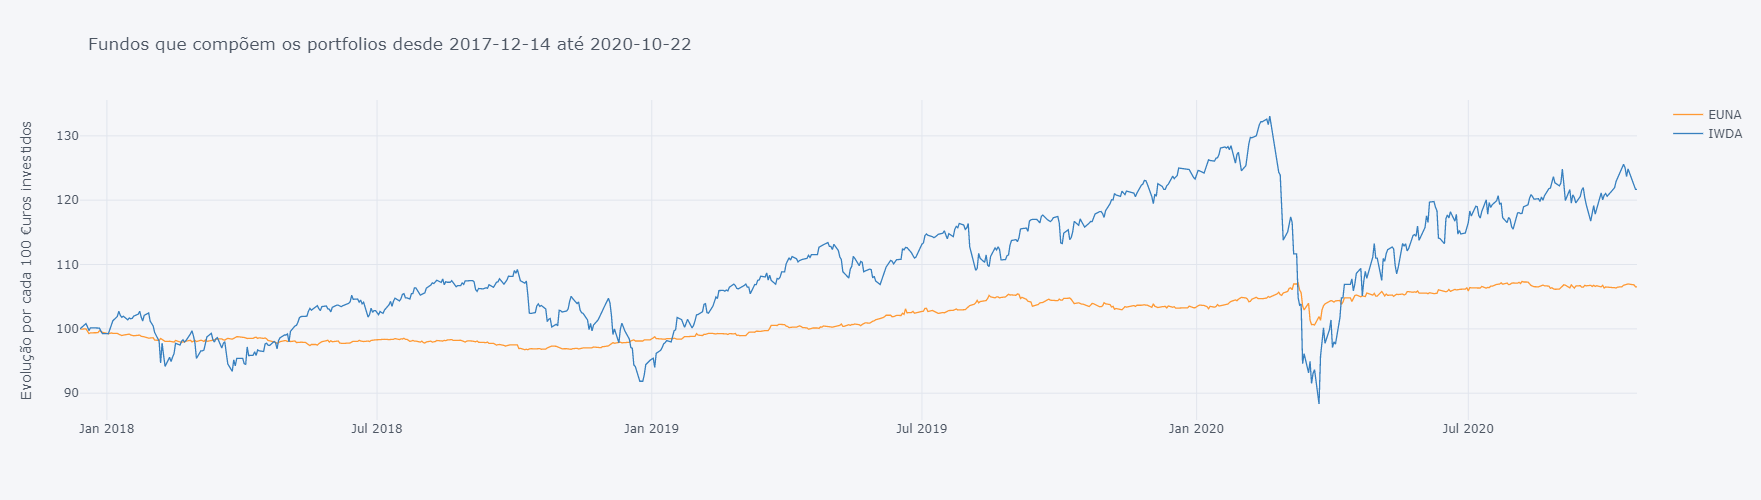

In [58]:
fundos.iplot(dimensions=fa.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

In [54]:
pl.print_title('Correlação entre retornos diários dos ETFs')
returns.corr()

**Correlação entre retornos diários dos ETFs**

,EUNA,IWDA
EUNA,1.00,-0.10
IWDA,-0.10,1.00


In [27]:
agressivo = pl.compute_portfolio(fundos, [0.3, 0.7])
moderado = pl.compute_portfolio(fundos, [0.5, 0.5])
conservador = pl.compute_portfolio(fundos, [0.7, 0.3])

In [28]:
portfolios = pl.merge_time_series(conservador, moderado)
portfolios = pl.merge_time_series(portfolios, agressivo)

In [29]:
portfolios.columns = ['Cons.', 'Mod.', 'Agr.'] 

### Portfolios:

- Portfolio Conservador:
    - 30% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 70% AGGH/EUNA - iShares Core Global Aggregate Bond UCITS ETF [Homepage](https://www.blackrock.com/americas-offshore/products/291770/ishares-core-global-aggregate-bond-ucits-etf-eur-hedged-acc-fund) // [Factsheet em Português](https://www.blackrock.com/americas-offshore/literature/fact-sheet/aggh-ishares-core-global-aggregate-bond-ucits-etf-fund-fact-sheet-pt-lm.pdf)
    
    
- Portfolio Moderado:
    - 50% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 50% AGGH/EUNA - iShares Core Global Aggregate Bond UCITS ETF [Homepage](https://www.blackrock.com/americas-offshore/products/291770/ishares-core-global-aggregate-bond-ucits-etf-eur-hedged-acc-fund) // [Factsheet em Português](https://www.blackrock.com/americas-offshore/literature/fact-sheet/aggh-ishares-core-global-aggregate-bond-ucits-etf-fund-fact-sheet-pt-lm.pdf)
    
    
- Portfolio Agressivo:
    - 70% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 30% AGGH/EUNA - iShares Core Global Aggregate Bond UCITS ETF [Homepage](https://www.blackrock.com/americas-offshore/products/291770/ishares-core-global-aggregate-bond-ucits-etf-eur-hedged-acc-fund) // [Factsheet em Português](https://www.blackrock.com/americas-offshore/literature/fact-sheet/aggh-ishares-core-global-aggregate-bond-ucits-etf-fund-fact-sheet-pt-lm.pdf)

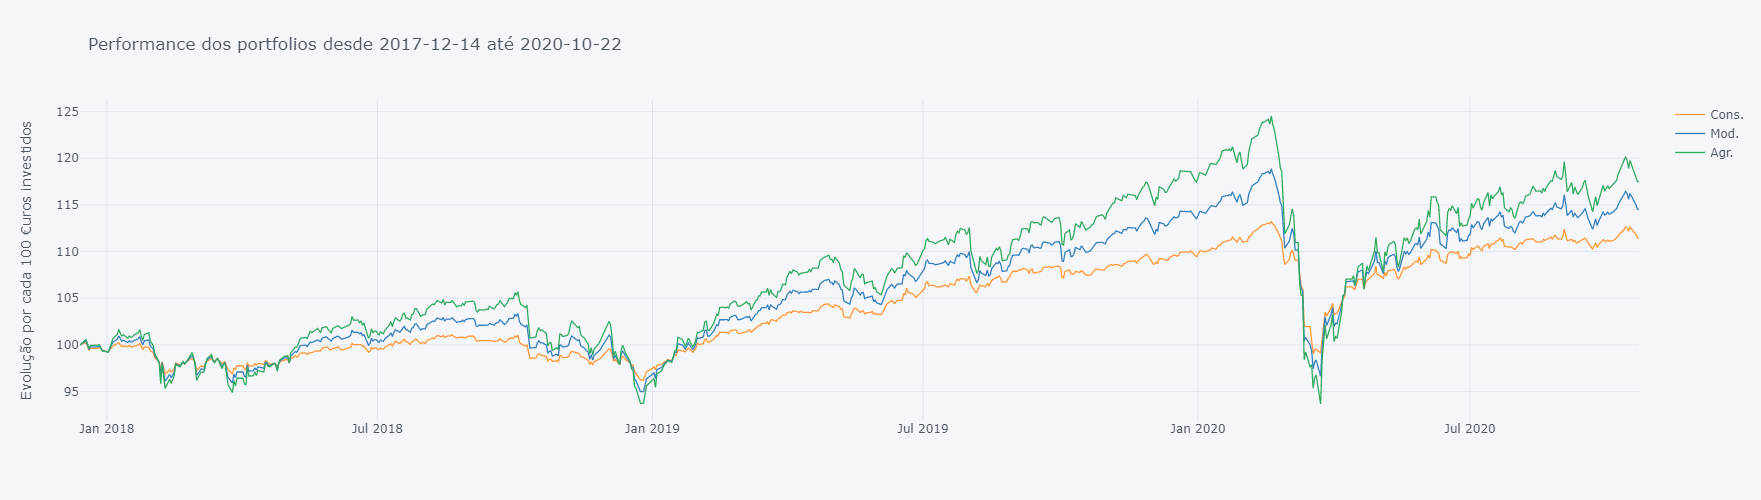

In [56]:
portfolios.iplot(dimensions=pl.dimensions, title='Performance dos portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

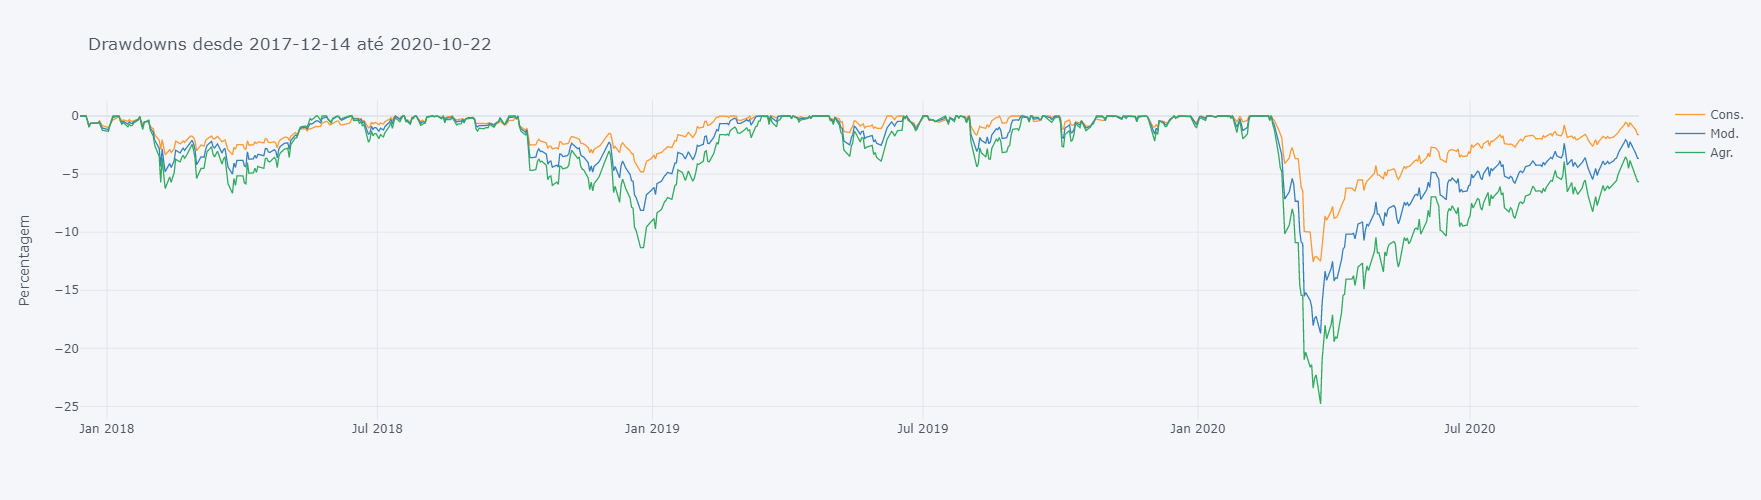

In [31]:
round(fa.compute_drawdowns(portfolios), 2).iplot(dimensions=pl.dimensions, title='Drawdowns desde ' +  Begin + ' até ' + End, yTitle='Percentagem')

In [36]:
pl.compute_performance_table(portfolios)

**Performance from 2017-12-14 to 2020-10-22 (≈ 2.9 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Cons.,3.86%,11.43%,5.66%,0.68,-12.56%,0.31
Mod.,4.86%,14.53%,8.86%,0.55,-18.71%,0.26
Agr.,5.80%,17.49%,12.46%,0.47,-24.79%,0.23


In [38]:
pl.compute_performance_table(portfolios, years=1)

**Performance from 2019-10-22 to 2020-10-22 (1 year)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Cons.,3.47%,3.47%,7.60%,0.45,-12.56%,0.28
Mod.,3.82%,3.82%,11.84%,0.32,-18.71%,0.20
Agr.,4.07%,4.07%,16.83%,0.24,-24.79%,0.16


In [45]:
pl.compute_yearly_returns(portfolios, color=True)

**Yearly Returns**

,2018,2019,2020
Cons.,-2.07%,12.42%,1.82%
Mod.,-2.67%,17.33%,0.93%
Agr.,-3.26%,22.23%,0.03%


In [47]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

HTML("""
<style>

::-webkit-scrollbar {
    width: 12px;
}
 
::-webkit-scrollbar-track {
    -webkit-box-shadow: inset 0 0 6px rgba(0,0,0,0.5); 
    border-radius: 10px;
}
 
::-webkit-scrollbar-thumb {
    border-radius: 10px;
    -webkit-box-shadow: inset 0 0 6px rgba(0,0,0,0.9); 
}

overflow-y: scroll;
    max-height: 500px;
    
   </style>
""")

Código ON/OFF